In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df_covid19_county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [4]:
df_covid19_county.tail()

,date,county,state,fips,cases,deaths
385980,2020-07-30,Sweetwater,Wyoming,56037.0,237,2
385981,2020-07-30,Teton,Wyoming,56039.0,331,1
385982,2020-07-30,Uinta,Wyoming,56041.0,247,1
385983,2020-07-30,Washakie,Wyoming,56043.0,45,5
385984,2020-07-30,Weston,Wyoming,56045.0,5,0


In [5]:
grouping = df_covid19_county[df_covid19_county['date']=='2020-07-30']

print(grouping)

              date      county    state     fips  cases  deaths
382767  2020-07-30     Autauga  Alabama   1001.0   1002      21
382768  2020-07-30     Baldwin  Alabama   1003.0   3028      21
382769  2020-07-30     Barbour  Alabama   1005.0    585       5
382770  2020-07-30        Bibb  Alabama   1007.0    352       2
382771  2020-07-30      Blount  Alabama   1009.0    731       3
...            ...         ...      ...      ...    ...     ...
385980  2020-07-30  Sweetwater  Wyoming  56037.0    237       2
385981  2020-07-30       Teton  Wyoming  56039.0    331       1
385982  2020-07-30       Uinta  Wyoming  56041.0    247       1
385983  2020-07-30    Washakie  Wyoming  56043.0     45       5
385984  2020-07-30      Weston  Wyoming  56045.0      5       0

[3218 rows x 6 columns]


              date         county          state     fips   cases  deaths
384619  2020-07-30  New York City       New York      NaN  229551   22996
383377  2020-07-30           Cook       Illinois  17031.0  104691    4872
382970  2020-07-30    Los Angeles     California   6037.0  185872    4552
384084  2020-07-30          Wayne       Michigan  26163.0   26949    2800
384618  2020-07-30         Nassau       New York  36059.0   43158    2706
384543  2020-07-30          Essex     New Jersey  34013.0   19684    2100
384638  2020-07-30        Suffolk       New York  36103.0   43170    2043
384538  2020-07-30         Bergen     New Jersey  34003.0   20667    2040
382868  2020-07-30       Maricopa        Arizona   4013.0  114852    2011
383995  2020-07-30      Middlesex  Massachusetts  25017.0   25617    1974


<BarContainer object of 10 artists>

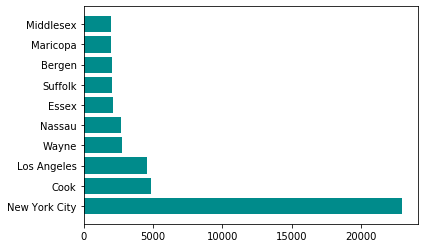

In [6]:
df = grouping.nlargest(10,'deaths')
print(df
     )
plt.barh(df['county'],df['deaths'],color="darkcyan")

In [7]:
state = (df_covid19_county['state'] =='North Carolina')
df_state = df_covid19_county.loc[state]
print(df_state)
county = (df_state['county']=='Mecklenburg')
df_county = df_state.loc[county]
print(df_county)

              date   county           state     fips  cases  deaths
483     2020-03-03     Wake  North Carolina  37183.0      1       0
520     2020-03-04     Wake  North Carolina  37183.0      1       0
567     2020-03-05     Wake  North Carolina  37183.0      1       0
630     2020-03-06  Chatham  North Carolina  37037.0      1       0
631     2020-03-06     Wake  North Carolina  37183.0      1       0
...            ...      ...             ...      ...    ...     ...
384744  2020-07-30    Wayne  North Carolina  37191.0   2262      37
384745  2020-07-30   Wilkes  North Carolina  37193.0    721       9
384746  2020-07-30   Wilson  North Carolina  37195.0   1354      32
384747  2020-07-30   Yadkin  North Carolina  37197.0    473       6
384748  2020-07-30   Yancey  North Carolina  37199.0     71       0

[12608 rows x 6 columns]
              date       county           state     fips  cases  deaths
1532    2020-03-12  Mecklenburg  North Carolina  37119.0      2       0
1826    2020-0

In [8]:
df_county['deaths_count'] = df_county.deaths.diff()

C:\Users\mulla\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
print(df_county['deaths_count'].sum())

202.0


In [10]:
df = df_county[['date','deaths_count']].copy()

print(df)

              date  deaths_count
1532    2020-03-12           NaN
1826    2020-03-13           0.0
2180    2020-03-14           0.0
2592    2020-03-15           0.0
3054    2020-03-16           0.0
...            ...           ...
371845  2020-07-26           0.0
375057  2020-07-27           1.0
378273  2020-07-28           6.0
381490  2020-07-29           3.0
384708  2020-07-30           4.0

[141 rows x 2 columns]


In [11]:
df.date.dtype

dtype('O')

In [12]:
df['date']=pd.to_datetime(df['date'])

df.set_index('date',inplace = True)

In [13]:
df['deaths_count'] = df['deaths_count'].fillna(0)

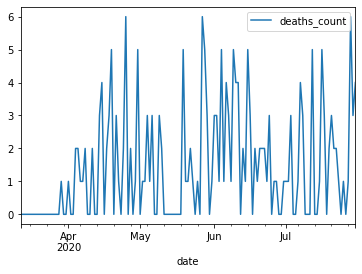

In [14]:
df.plot()

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['deaths_count'])

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(deaths_count):
    result=adfuller(deaths_count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adfuller_test(df['deaths_count'])

ADF Test Statistic : -9.780417396323681
p-value : 6.756828780712785e-17
#Lags Used : 0
Number of Observations Used : 140
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [25]:
df['deaths_count_difference'] = df['deaths_count'] - df['deaths_count'].shift(1)

In [26]:
df.head()

,deaths_count,prediction,deaths_count_difference
date,,,
2020-03-12,0.0,NaN,NaN
2020-03-13,0.0,NaN,0.0
2020-03-14,0.0,NaN,0.0
2020-03-15,0.0,NaN,0.0
2020-03-16,0.0,NaN,0.0


In [27]:

## Again test dickey fuller test
adfuller_test(df['deaths_count_difference'].dropna())

ADF Test Statistic : -7.053400997406584
p-value : 5.452717563717338e-10
#Lags Used : 7
Number of Observations Used : 132
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


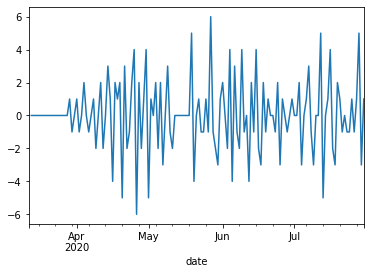

In [28]:
df['deaths_count_difference'].plot()

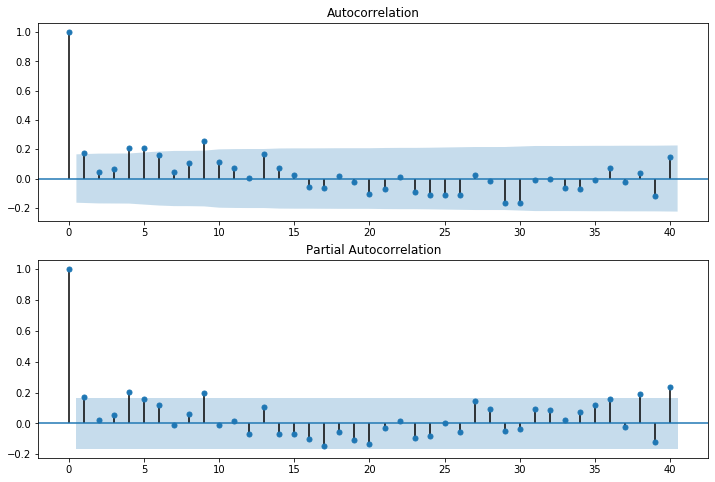

In [120]:
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['deaths_count'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['deaths_count'],lags=40,ax=ax2)

In [96]:

model=sm.tsa.statespace.SARIMAX(df['deaths_count'],order=(3,1,0),seasonal_order=(3,1,0,4))
results=model.fit()

C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


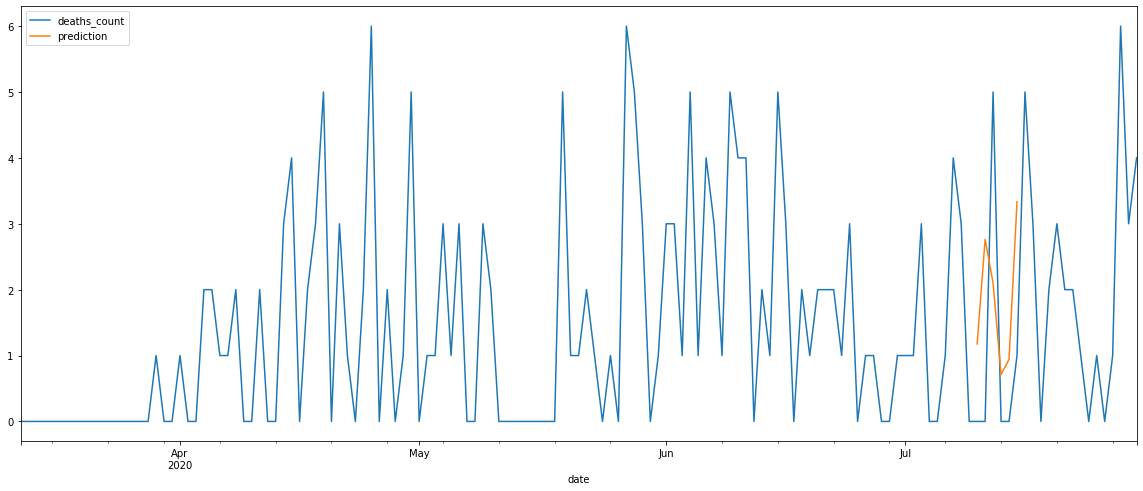

In [103]:
df['prediction']=results.predict(start=120,end=125,dynamic=True)
df[['deaths_count','prediction']].plot(figsize=(20,8))

In [104]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1]+DateOffset(days=x) for x in range(0,8)]

future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [105]:
future_dates.tail()

,deaths_count,prediction,deaths_count_difference
2020-08-02,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN
2020-08-06,NaN,NaN,NaN


In [106]:
future_df=pd.concat([df,future_dates])

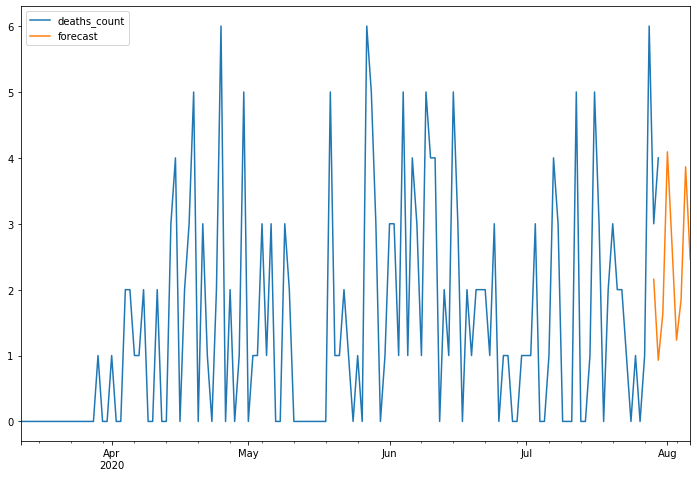

In [111]:
future_df['forecast'] = results.predict(start = 139, end = 147, dynamic= True)  
future_df[['deaths_count', 'forecast']].plot(figsize=(12, 8))

In [123]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(df['deaths_count'],order=(1,1,0))
model_fit=model.fit()

C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


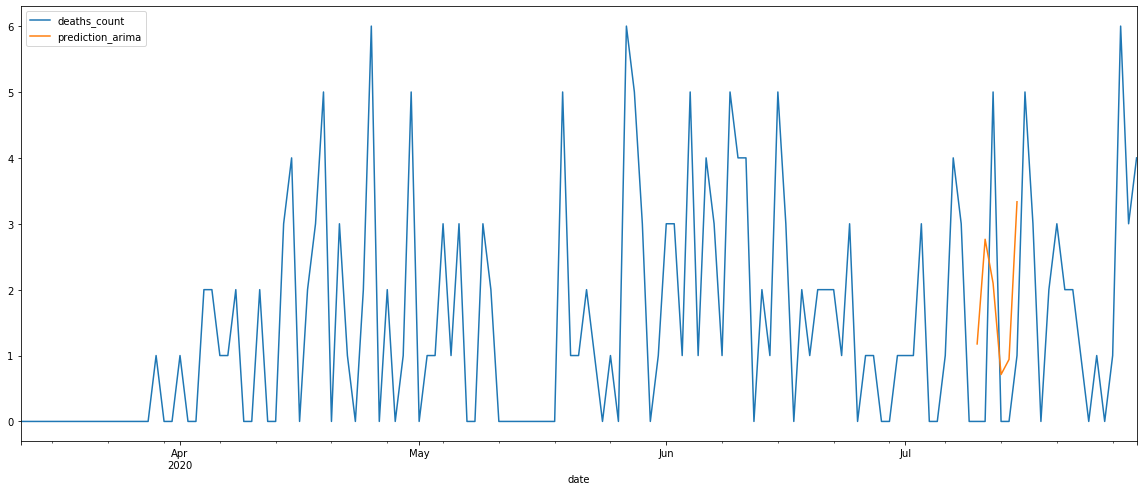

In [124]:
df['prediction_arima']=results.predict(start=120,end=125,dynamic=True)
df[['deaths_count','prediction_arima']].plot(figsize=(20,8))

In [126]:
future_dates_arima = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [128]:
future_dates_arima.head()

,deaths_count,prediction,deaths_count_difference,prediction_arima
2020-07-31,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN


In [129]:
future_df_arima=pd.concat([df,future_dates_arima])

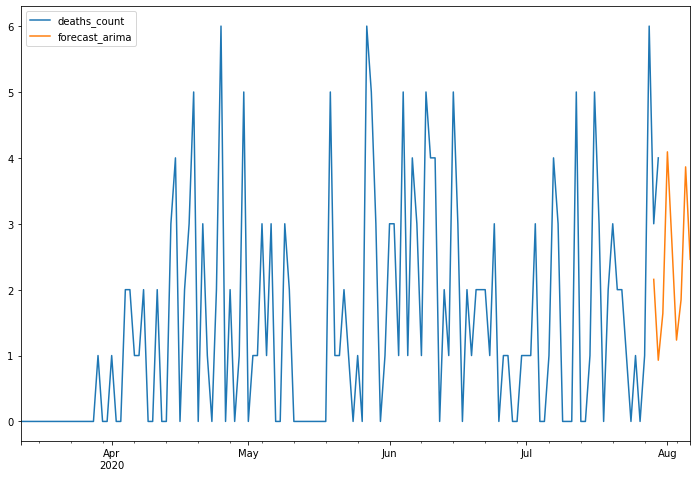

In [239]:
future_df_arima['forecast_arima'] = results.predict(start = 139, end = 147, dynamic= True)  
future_df_arima[['deaths_count', 'forecast_arima']].plot(figsize=(12, 8))

# Prediction using Active Cases 

In [131]:
df_county['active_count'] = df_county.cases.diff()

C:\Users\mulla\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
print(df_county['active_count'].sum())

20259.0


In [133]:
df_active = df_county[['date','active_count']].copy()

print(df_active)

              date  active_count
1532    2020-03-12           NaN
1826    2020-03-13           0.0
2180    2020-03-14           0.0
2592    2020-03-15           2.0
3054    2020-03-16           0.0
...            ...           ...
371845  2020-07-26         227.0
375057  2020-07-27         212.0
378273  2020-07-28         227.0
381490  2020-07-29         217.0
384708  2020-07-30         337.0

[141 rows x 2 columns]


In [134]:
df_active['date']=pd.to_datetime(df_active['date'])

df_active.set_index('date',inplace = True)

In [135]:
df_active['active_count'] = df_active['active_count'].fillna(0)

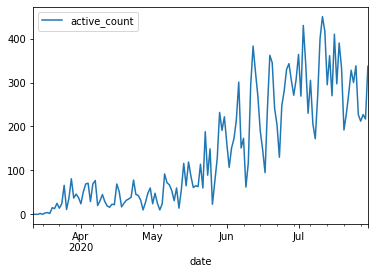

In [137]:
df_active.plot()

In [138]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

active_result=adfuller(df_active['active_count'])

In [141]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test_active(active_count):
    result_active=adfuller(active_count)
    labels_active = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result_active,labels_active):
        print(label+' : '+str(value) )
    if result_active[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [142]:
adfuller_test_active(df_active['active_count'])

ADF Test Statistic : -0.7535079732391881
p-value : 0.8323988969633885
#Lags Used : 6
Number of Observations Used : 134
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


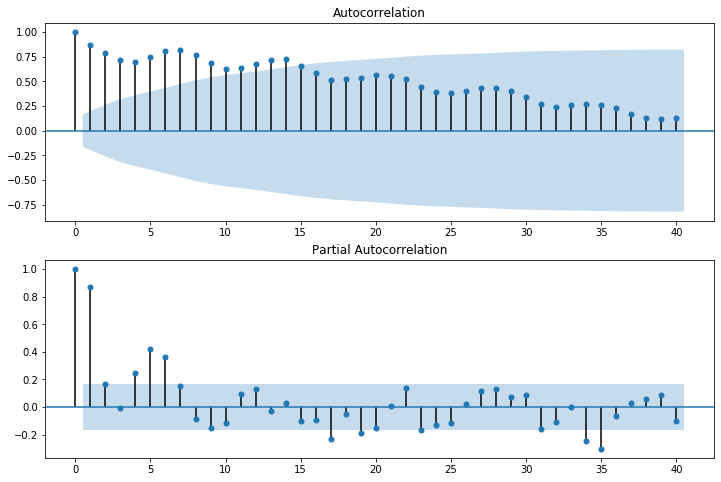

In [143]:
fig1 = plt.figure(figsize=(12,8))
ax1_1 = fig1.add_subplot(211)
fig1 = sm.graphics.tsa.plot_acf(df_active['active_count'],lags=40,ax=ax1_1)
ax2_1 = fig1.add_subplot(212)
fig1 = sm.graphics.tsa.plot_pacf(df_active['active_count'],lags=40,ax=ax2_1)

In [180]:

model_active=ARIMA(df_active['active_count'],order=(7,0,4))
model_fit_active=model_active.fit()

C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\mulla\anaconda3\lib\site-packages\statsmodels\ba

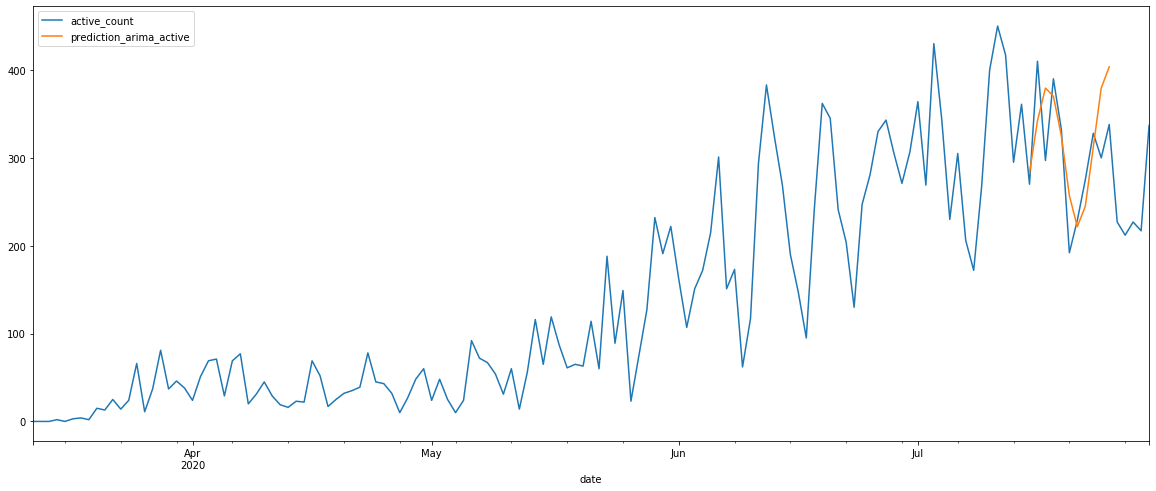

In [233]:
df_active['prediction_arima_active']=model_fit_active.predict(start=125,end=135,dynamic=True)
df_active[['active_count','prediction_arima_active']].plot(figsize=(20,8))

In [236]:

add_dates_active = [df_active.index[-1]+DateOffset(days=x) for x in range(0,8)]

future_dates_active = pd.DataFrame(index=add_dates_active[1:],columns=df_active.columns)

In [237]:
future_dates_active.head() 

,active_count,prediction_arima_active,prediction_sari
2020-07-31,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN


In [238]:
future_df_active_ar=pd.concat([df_active,future_dates_active])

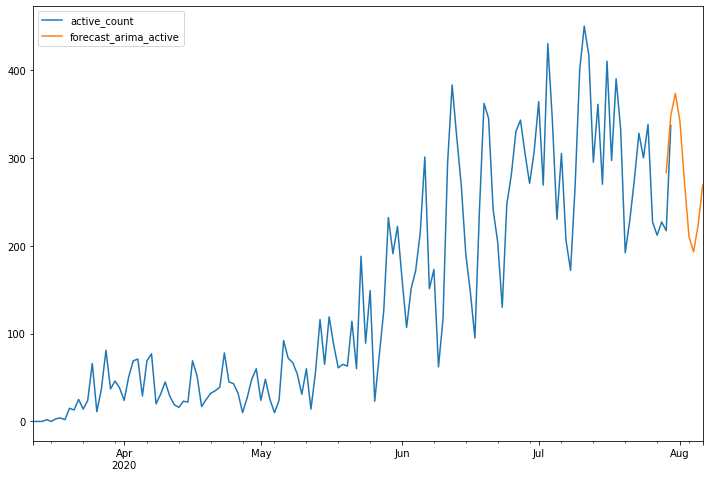

In [240]:
future_df_active_ar['forecast_arima_active'] = model_fit_active.predict(start = 139, end = 147, dynamic= True)  
future_df_active_ar[['active_count', 'forecast_arima_active']].plot(figsize=(12, 8))